In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
raw_benchmark_results = pd.read_csv('../benchmarks/2020-11-29-against-diffutils.csv')

raw_benchmark_results.sample(5)

,generation_config_i,input_strategy,input_length_1,input_change_strength,input_chunkiness,input_distribution,regen_i,repetition_i,diff_program,mpi_procs,micros_until_len
411,114,addremove,753,0.2,0.0,zipf,0,1,own_sequential,NaN,2732
20,154,remove,4999,0.8,0.0,zipf,0,0,own_sequential,NaN,51966
323,85,addremove,113,0.4,0.0,zipf,0,1,diffutils,NaN,50
431,157,add,4999,1.0,0.0,zipf,0,1,diffutils,NaN,113673
799,42,remove,6,0.8,0.0,zipf,0,1,own_mpi,8.0,881


In [4]:
indexed_benchmark_results = raw_benchmark_results.set_index(['generation_config_i', 'regen_i', 'diff_program', 'repetition_i'])
indexed_benchmark_results

input_strategy  \
generation_config_i regen_i diff_program   repetition_i                  
115                 0       own_mpi        0                       add   
                                           1                       add   
                            own_sequential 0                       add   
                                           1                       add   
                            diffutils      0                       add   
...                                                                ...   
101                 0       own_mpi        1                 addremove   
                            own_sequential 0                 addremove   
                                           1                 addremove   
                            diffutils      0                 addremove   
                                           1                 addremove   

                                                         input_length_1  \
generation_config_i regen_i diff_program   repetition_i                   
115                 0       own_mpi        0                        753   
                                           1                        753   
                            own_sequential 0                        753   
                                           1                        753   
                            diffutils      0                        753   
...                                                                 ...   
101                 0       own_mpi        1                        292   
                            own_sequential 0                        292   
                                           1                        292   
                            diffutils      0                        292   
                                           1                        292   

                                                         input_change_strength  \
generation_config_i regen_i diff_program   repetition_i                          
115                 0       own_mpi        0                               0.4   
                                           1                               0.4   
                            own_sequential 0                               0.4   
                                           1                               0.4   
                            diffutils      0                               0.4   
...                                                                        ...   
101                 0       own_mpi        1                               0.4   
                            own_sequential 0                               0.4   
                                           1                               0.4   
                            diffutils      0                               0.4   
                                           1                               0.4   

                                                         input_chunkiness  \
generation_config_i regen_i diff_program   repetition_i                     
115                 0       own_mpi        0                          0.0   
                                           1                          0.0   
                            own_sequential 0                          0.0   
                                           1                          0.0   
                            diffutils      0                          0.0   
...                                                                   ...   
101                 0       own_mpi        1                          0.0   
                            own_sequential 0                          0.0   
                                           1                          0.0   
                            diffutils      0                          0.0   
                                           1                          0.0   

                                                

In [9]:
unique_regen_i_values = sorted(np.unique(indexed_benchmark_results.index.get_level_values('regen_i').values))
assert(unique_regen_i_values == [0])

In [18]:
indexed_benchmark_results.xs('own_mpi', level='diff_program')

input_strategy  input_length_1  \
generation_config_i regen_i repetition_i                                  
115                 0       0                       add             753   
                            1                       add             753   
44                  0       0               independent               6   
                            1               independent               6   
116                 0       0                    remove             753   
...                                                 ...             ...   
63                  0       1                 addremove              17   
53                  0       0                 addremove              17   
                            1                 addremove              17   
101                 0       0                 addremove             292   
                            1                 addremove             292   

                                          input_change_strength  \
generation_config_i regen_i repetition_i                          
115                 0       0                               0.4   
                            1                               0.4   
44                  0       0                               1.0   
                            1                               1.0   
116                 0       0                               0.4   
...                                                         ...   
63                  0       1                               1.0   
53                  0       0                               0.4   
                            1                               0.4   
101                 0       0                               0.4   
                            1                               0.4   

                                          input_chunkiness input_distribution  \
generation_config_i regen_i repetition_i                                        
115                 0       0                          0.0               zipf   
                            1                          0.0               zipf   
44                  0       0                          0.0               zipf   
                            1                          0.0               zipf   
116                 0       0                          0.0               zipf   
...                                                    ...                ...   
63                  0       1                          0.0               zipf   
53                  0       0                          0.0               zipf   
                            1                          0.0               zipf   
101                 0       0                          0.0               zipf   
                            1                          0.0               zipf   

                                          mpi_procs  micros_until_len  
generation_config_i regen_i repetition_i                               
115                 0       0                   8.0             26389  
                            1                   8.0             40802  
44                  0       0                   8.0               315  
                            1                   8.0               162  
116                 0       0                   8.0             21216  
...                                             ...               ...  
63                  0       1                   8.0             35009  
53                  0       0                   8.0              8804  
                            1                   8.0              6151  
101                 0       0                   8.0              3578  
                            1                   8.0             92396  

[320 rows x 7 columns]

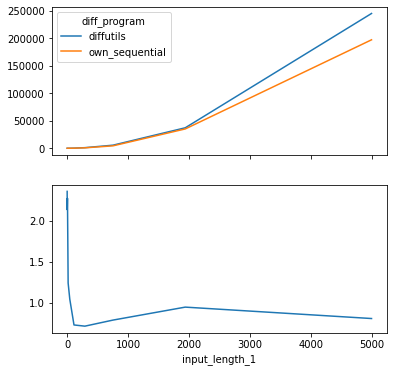

In [41]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

temp = indexed_benchmark_results.groupby(['generation_config_i', 'diff_program']).min()
temp = temp[temp.index.get_level_values('diff_program').isin(['own_sequential', 'diffutils'])]
temp = temp[temp['input_strategy'] == 'independent']
temp = temp.set_index('input_length_1', append=True)
temp = temp.unstack('diff_program')['micros_until_len']
temp = temp.droplevel('generation_config_i')
temp = temp.sort_index()

temp.plot(ax=ax[0]);
(temp.own_sequential / temp.diffutils).plot(ax=ax[1]);

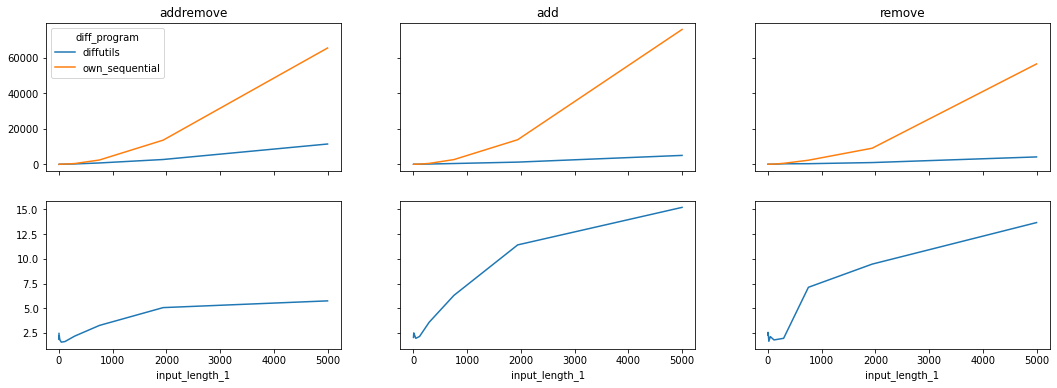

In [52]:
fig, ax = plt.subplots(2, 3, figsize=(18, 6), sharex=True, sharey='row')
for input_strategy_i, input_strategy in enumerate(['addremove', 'add', 'remove']):
    temp = indexed_benchmark_results.groupby(['generation_config_i', 'diff_program']).min()
    temp = temp[(temp['input_strategy'] == input_strategy) & (temp['input_change_strength'] == 0.2) & (temp['input_chunkiness'] == 0)]
    temp = temp[temp.index.get_level_values('diff_program').isin(['own_sequential', 'diffutils'])]
    temp = temp.set_index('input_length_1', append=True)
    temp = temp.unstack('diff_program')['micros_until_len']
    temp = temp.droplevel('generation_config_i')
    temp = temp.sort_index()

    temp.plot(ax=ax[0][input_strategy_i], legend=(input_strategy_i == 0), title=input_strategy);
    (temp.own_sequential / temp.diffutils).plot(ax=ax[1][input_strategy_i]);

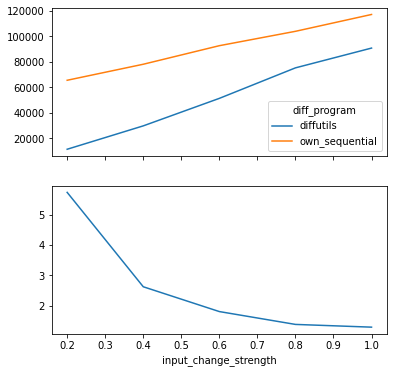

In [56]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

temp = indexed_benchmark_results.groupby(['generation_config_i', 'diff_program']).min()
temp = temp[(temp['input_strategy'] == 'addremove') & (temp['input_length_1'] == temp['input_length_1'].max()) & (temp['input_chunkiness'] == 0)]
temp = temp[temp.index.get_level_values('diff_program').isin(['own_sequential', 'diffutils'])]
temp = temp.set_index('input_change_strength', append=True)
temp = temp.unstack('diff_program')['micros_until_len']
temp = temp.droplevel('generation_config_i')
temp = temp.sort_index()

temp.plot(ax=ax[0]);
(temp.own_sequential / temp.diffutils).plot(ax=ax[1]);

0.078125
0.128125
0.046875


,input_strategy,input_length_1,input_change_strength,input_chunkiness,input_distribution,mpi_procs,micros_until_len
0,add,2,1.0,0.0,zipf,8.0,117
1,addremove,44,0.8,0.0,zipf,8.0,42451
2,addremove,113,0.6,0.0,zipf,8.0,9335
3,addremove,113,0.6,0.0,zipf,8.0,9335
4,add,113,0.8,0.0,zipf,8.0,13897
5,remove,113,0.8,0.0,zipf,8.0,30875
6,addremove,113,0.8,0.0,zipf,8.0,2819
7,addremove,113,0.8,0.0,zipf,8.0,2819
8,independent,113,1.0,0.0,zipf,8.0,127206
9,independent,113,1.0,0.0,zipf,8.0,127206


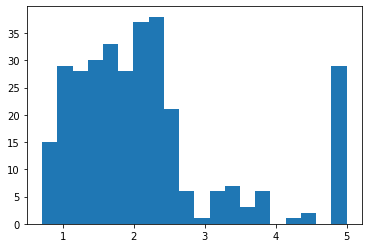

In [103]:
temp = indexed_benchmark_results['micros_until_len'].unstack('diff_program')
print((temp.own_sequential < temp.diffutils).mean())
print((temp.own_sequential < 1.1 * temp.diffutils).mean())
print((1.1 * temp.own_sequential < temp.diffutils).mean())

hist_values = temp.own_sequential / temp.diffutils
hist_values = hist_values.clip(upper=5)
plt.hist(hist_values, bins=20);

beaten_rows = []
for generation_config_i in temp[temp.own_sequential < temp.diffutils].index.get_level_values('generation_config_i'):
    beaten_rows.append(indexed_benchmark_results.xs(generation_config_i, level='generation_config_i').iloc[0].to_dict())
pd.DataFrame(beaten_rows)